In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import random
import time
from numpy.random import seed
from numpy.random import randint

## Hybridsort algo

In [2]:
def hybridSort(L, S):
    size = len(L)
    kc = 0
    if size > S:
        if size > 1:
            L1, kc1 = hybridSort(L[:(size) // 2], S)
            L2, kc2 = hybridSort(L[size // 2:], S)
            L, keys = merge(L1, L2)
            kc += kc1 + kc2 + keys
        else:
            return L, kc
    else:
        kc += insertion(L)
    return L, kc

def insertion(L):
    key_comparison = 0
    for i in range(1,len(L)):
        for j in range(i,0,-1):
            key_comparison += 1
            if L[j]<L[j-1]:
                L[j],L[j-1] = L[j-1],L[j]
            else:
                break
    return key_comparison

def merge(L1, L2):
    merged = []
    kc = 0
    i = j = 0
    while i < len(L1) and j < len(L2):
        kc += 1
        if L1[i] < L2[j]:
            merged.append(L1[i])
            i += 1
        else:
            merged.append(L2[j])
            j += 1
    merged.extend(L1[i:])
    merged.extend(L2[j:])
    return merged, kc

## Original mergesort

In [3]:
def origMerge(L1,L2):
    merged=[] #temp arr to str sorted
    kc=0
    if (type(L1) is tuple):
        L1,keys=L1
        kc+=keys
    if (type(L2) is tuple):
        L2,keys=L2
        kc+=keys
    i = j = 0
    while i < len(L1) and j < len(L2):
        kc += 1
        if L1[i] < L2[j]:
            merged.append(L1[i])
            i += 1
        else:
            merged.append(L2[j])
            j += 1
    merged.extend(L1[i:])
    merged.extend(L2[j:])
    return merged, kc

def origMergeSort(L):
    mid = (len(L)-1)//2 #index to split at
    if (len(L)==0 or len(L)==1):
        return L,0
    else:
        x1 =  origMergeSort(L[:(mid+1)])
        x2 =  origMergeSort(L[(mid+1):])

    L,kc= origMerge(x1,x2)
    return L,kc

## Comparing graphs

In [4]:
def graph(algo,start,stop,step):
    finalkc =[]
    finaltime =[]
    arrsize = []
    for i in range(start,stop,step):
        arr = [random.randint(1, 5000000) for _ in range(i)]

        start_time = time.time()
        if (type(algo(arr)) is tuple):
            key_comparisons = algo(arr)[1]
        else:
            key_comparisons = algo(arr)
        end_time = time.time()
        cpu_time_used = end_time - start_time
        print(f"Size: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
        finalkc.append(key_comparisons)
        finaltime.append(cpu_time_used) 
        arrsize.append(i)
    return arrsize, finalkc, finaltime


def graph_hybrid(algo, threshold, start, stop, step):
    finalkc =[]
    finaltime =[]
    arrsize = []
    for i in range(start,stop,step):
        arr = [random.randint(1, 5000000) for _ in range(i)]

        start_time = time.time()
        if (type(algo(arr,threshold)) is tuple):
            key_comparisons = algo(arr,threshold)[1]
        else:
            key_comparisons = algo(arr,threshold)
        end_time = time.time()
        cpu_time_used = end_time - start_time
        print(f"Size: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
        finalkc.append(key_comparisons)
        finaltime.append(cpu_time_used) 
        arrsize.append(i)
    return arrsize, finalkc, finaltime

Size: 0, Key Comparisons: 0, Time: 2.1457672119140625e-06 seconds
Size: 1000, Key Comparisons: 999, Time: 0.05416107177734375 seconds
Size: 2000, Key Comparisons: 1999, Time: 0.20579123497009277 seconds
Size: 3000, Key Comparisons: 2999, Time: 0.44216489791870117 seconds
Size: 4000, Key Comparisons: 3999, Time: 0.7986087799072266 seconds
Size: 5000, Key Comparisons: 4999, Time: 1.2636258602142334 seconds
Size: 6000, Key Comparisons: 5999, Time: 1.9481735229492188 seconds
Size: 7000, Key Comparisons: 6999, Time: 2.5638444423675537 seconds
Size: 8000, Key Comparisons: 7999, Time: 3.3664305210113525 seconds
Size: 9000, Key Comparisons: 8999, Time: 4.218093156814575 seconds
Size: 10000, Key Comparisons: 9999, Time: 5.223368167877197 seconds
Size: 0, Key Comparisons: 0, Time: 2.384185791015625e-06 seconds
Size: 1000, Key Comparisons: 8718, Time: 0.008044958114624023 seconds
Size: 2000, Key Comparisons: 19431, Time: 0.012782812118530273 seconds
Size: 3000, Key Comparisons: 30858, Time: 0.021

Text(0.5, 1.0, 'Merge Sort')

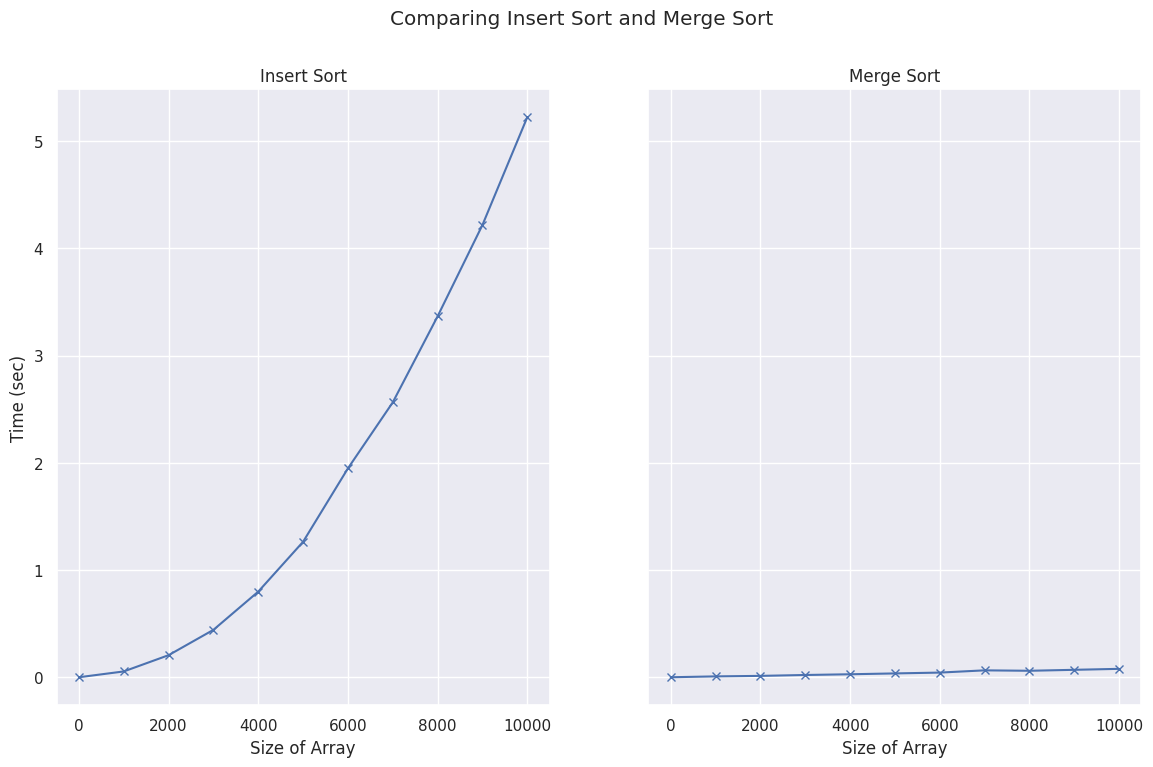

In [5]:
#compare insertion vs mergesort time complexity

fig, ax1 = plt.subplots(1, 2, figsize=(14,8), sharey=True)

fig.suptitle("Comparing Insert Sort and Merge Sort")
inser = graph(insertion,0,11000,1000)
mer = graph(origMergeSort,0,11000,1000)

ax1[0].plot(inser[0],inser[2], 'x-')
ax1[0].set_ylabel('Time (sec)')
ax1[0].set_xlabel('Size of Array')
ax1[0].set_title('Insert Sort')

ax1[1].plot(mer[0],mer[2], 'x-')
ax1[1].set_xlabel('Size of Array')
ax1[1].set_title('Merge Sort')

Worse case time complexity for insertion sort is O(${n^2}$) while mergesort is O(nlgn) hence the graph's results matches with the theoretical analysis of the time complexity.


Size: 0, Key Comparisons: 0, Time: 2.6226043701171875e-06 seconds
Size: 1000000, Key Comparisons: 18674014, Time: 11.994386911392212 seconds
Size: 2000000, Key Comparisons: 39349896, Time: 24.32378602027893 seconds
Size: 3000000, Key Comparisons: 60821495, Time: 41.076014280319214 seconds
Size: 4000000, Key Comparisons: 82697785, Time: 58.0905339717865 seconds
Size: 5000000, Key Comparisons: 105050704, Time: 71.6881742477417 seconds
Size: 6000000, Key Comparisons: 127643584, Time: 80.2166063785553 seconds
Size: 7000000, Key Comparisons: 150448331, Time: 95.78962755203247 seconds
Size: 8000000, Key Comparisons: 173394606, Time: 107.42551612854004 seconds
Size: 9000000, Key Comparisons: 196642737, Time: 123.57910108566284 seconds
Size: 10000000, Key Comparisons: 220097895, Time: 141.24745225906372 seconds
Size: 0, Key Comparisons: 0, Time: 4.0531158447265625e-06 seconds
Size: 1000000, Key Comparisons: 18727853, Time: 9.862941265106201 seconds
Size: 2000000, Key Comparisons: 39454176, Tim

Text(0.5, 1.0, 'Merge Sort')

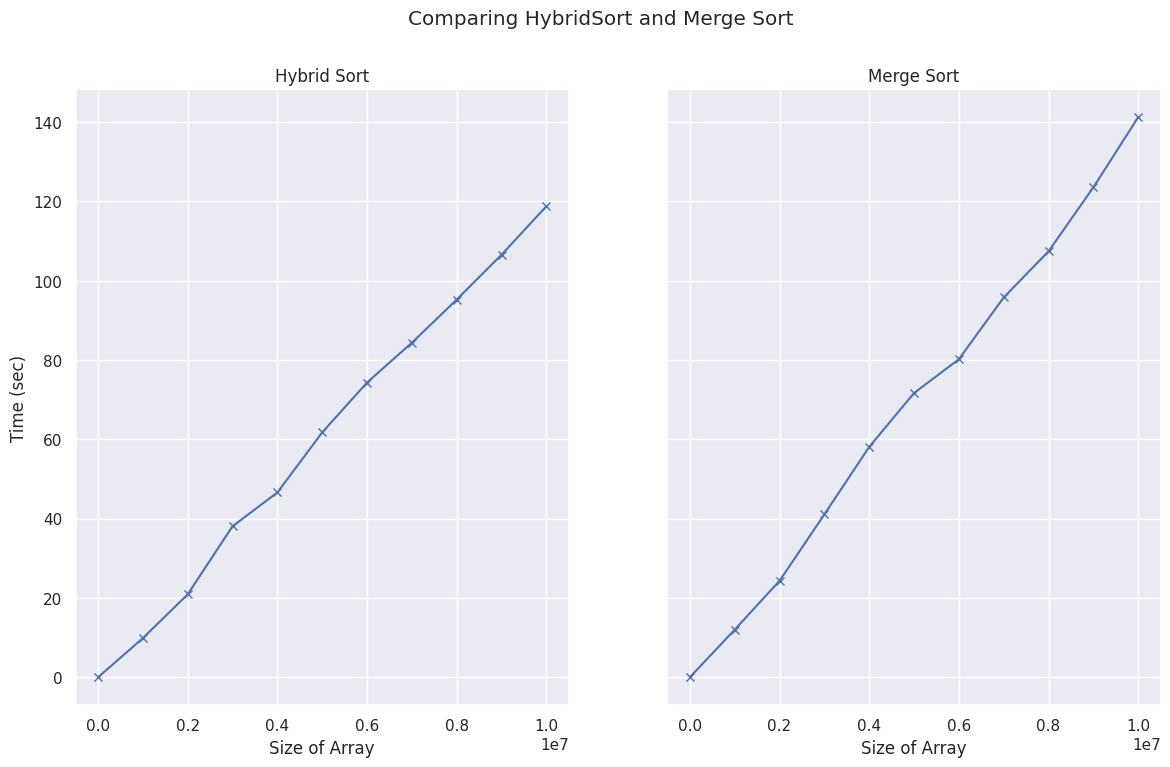

In [6]:
threshold = 5  # Set your threshold here
fig, ax1 = plt.subplots(1, 2, figsize=(14,8), sharey=True)

fig.suptitle("Comparing HybridSort and Merge Sort")
mer = graph(origMergeSort,0,11000000,1000000)
hybr = graph_hybrid(hybridSort,threshold,0,11000000,1000000)

ax1[0].plot(hybr[0],hybr[2], 'x-')
ax1[0].set_ylabel('Time (sec)')
ax1[0].set_xlabel('Size of Array')
ax1[0].set_title('Hybrid Sort')

ax1[1].plot(mer[0],mer[2], 'x-')
ax1[1].set_xlabel('Size of Array')
ax1[1].set_title('Merge Sort')

Comparing Mergesort with Hybridsort on 10 million integers, Hybridsort is faster than only doing Mergesort. This is because insertion sort is able to sort faster on smaller size arrays as it has O(n) for best case complexity whereas for mergesort, it is O(nlgn). Therefore we have to set a value S to decide when it should use merge and when it should use insertion. Therefore hybridsort is faster than mergesort.

Text(0.5, 1.0, 'Merge Sort')

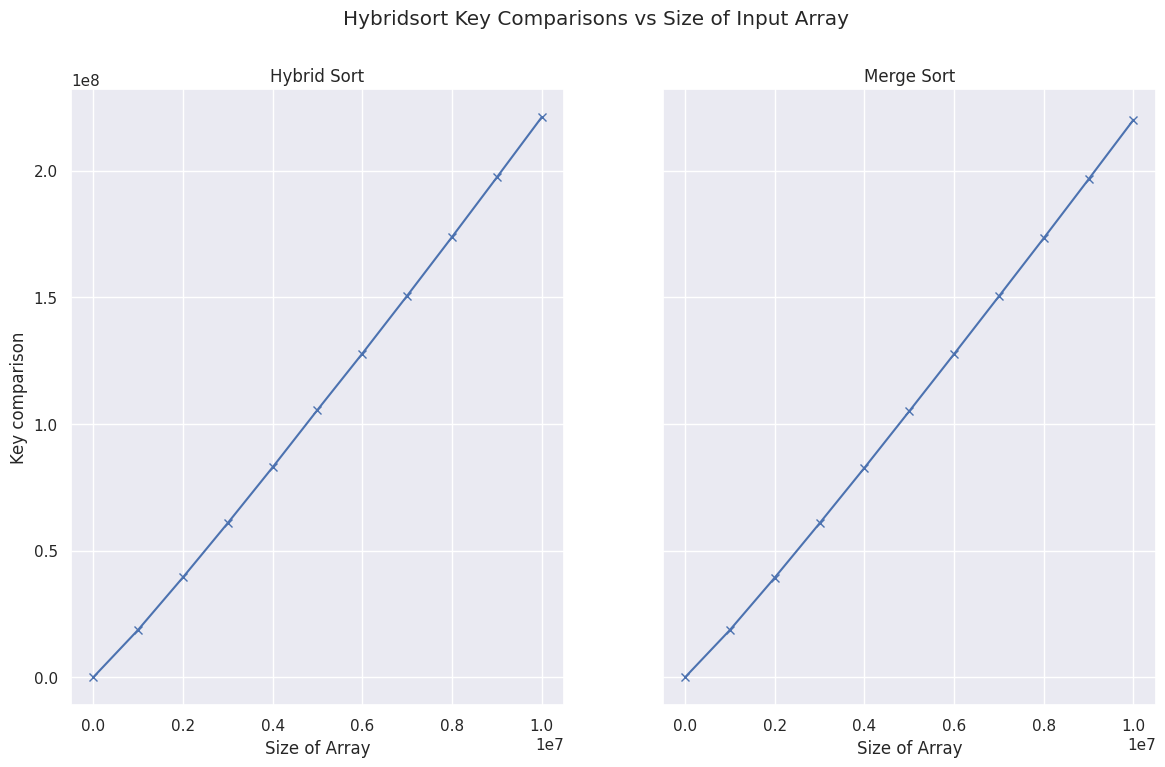

In [7]:
#With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.
fig, ax1 = plt.subplots(1, 2, figsize=(14,8), sharey=True)

fig.suptitle("Hybridsort Key Comparisons vs Size of Input Array")
ax1[0].plot(hybr[0],hybr[1], 'x-')
ax1[0].set_ylabel('Key comparison')
ax1[0].set_xlabel('Size of Array')
ax1[0].set_title('Hybrid Sort')

ax1[1].plot(mer[0],mer[1], 'x-')
ax1[1].set_xlabel('Size of Array')
ax1[1].set_title('Merge Sort')

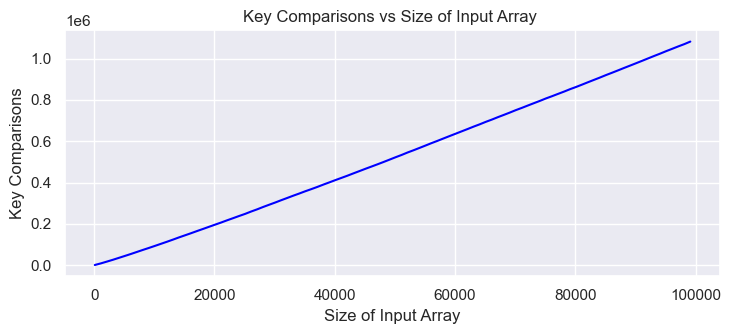

In [ ]:
#With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.
threshold = 4  # Set your threshold here


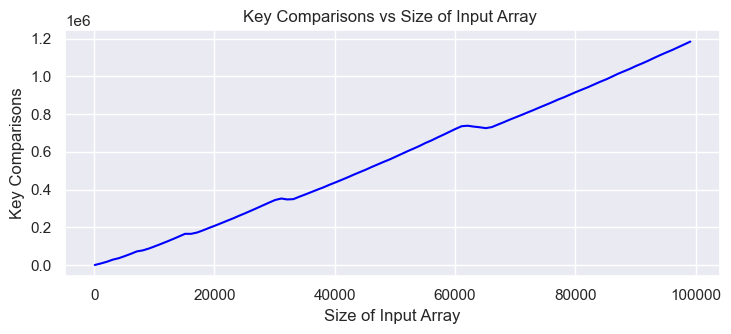

In [ ]:
#With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.
threshold = 15  # Set your threshold here


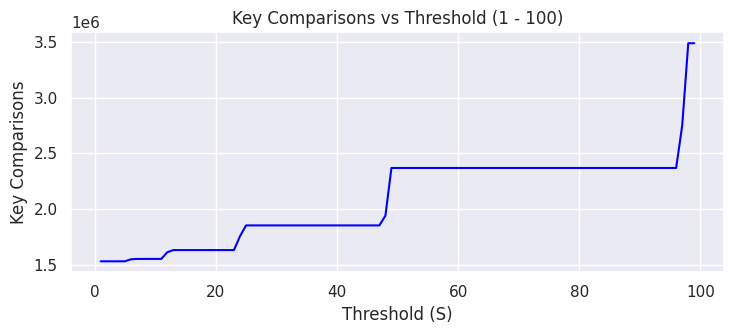

In [13]:
#With the input size setuptools fixed, plot the number of key comparisons over different values of S.
arr = list(randint(1, 100, 100000))
finaly =[]
finalx =[]
for i in range(1,100):
    threshold = i
    start_time = time.time()
    key_comparisons = hybridSort(arr,threshold)[1]
    end_time = time.time()
    cpu_time_used = end_time - start_time
    #print(f"Threshold S: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
    finaly.append(key_comparisons)
    finalx.append(i)
    
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Key Comparisons vs Threshold (1 - 100)")
plt.ylabel("Key Comparisons")
plt.xlabel("Threshold (S)")
plt.plot(x, y, color="blue")

plt.show()

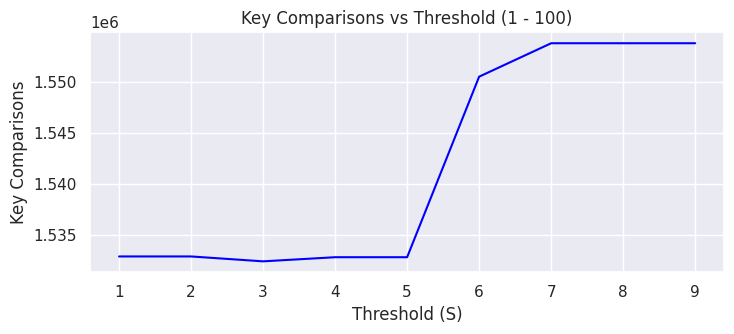

In [12]:
#With the input size setuptools fixed, plot the number of key comparisons over different values of S.
arr = list(randint(1, 100, 100000))
finaly =[]
finalx =[]
for i in range(1,10):
    threshold = i
    start_time = time.time()
    key_comparisons = hybridSort(arr,threshold)[1]
    end_time = time.time()
    cpu_time_used = end_time - start_time
    #print(f"Threshold S: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
    finaly.append(key_comparisons)
    finalx.append(i)
    
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Key Comparisons vs Threshold (1 - 100)")
plt.ylabel("Key Comparisons")
plt.xlabel("Threshold (S)")
plt.plot(x, y, color="blue")

plt.show()